In [1]:
import os
import sys
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [2]:
sys.path.append(os.path.abspath('../data'))
df = pd.read_csv("../data/InstagramData.csv", encoding = 'latin1')
(df.head())

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
df.shape

(119, 13)

In [4]:
y = df["Impressions"]
y

0       3920
1       5394
2       4021
3       4528
4       2518
       ...  
114    13700
115     5731
116     4139
117    32695
118    36919
Name: Impressions, Length: 119, dtype: int64

To create new columns that gives us the number of hashtages and the caption length


nb: Would have used vectorization but smalll dataset

In [5]:
def count_hashtags(hashtags):
    return len(str(hashtags).split())

def get_caption_length(caption):
    return len(str(caption))

df['num_hashtags'] = df['Hashtags'].apply(count_hashtags)
df['caption_length'] = df['Caption'].apply(get_caption_length)


Drop the target variable and the Original Caption and Hashtags columns

In [23]:
to_be_dropped = [ "From Other", "Caption", "Hashtags", 
                   "Impressions", "Comments", "caption_length"]
x = df.drop(to_be_dropped, axis= 1)
x.head()

,From Home,From Hashtags,From Explore,Saves,Shares,Likes,Profile Visits,Follows,num_hashtags
0,2586,1028,619,98,5,162,35,2,22
1,2727,1838,1174,194,14,224,48,10,18
2,2085,1188,0,41,1,131,62,12,18
3,2700,621,932,172,7,213,23,8,11
4,1704,255,279,96,4,123,8,0,29


In [24]:
scaler = MinMaxScaler()
group_scale = x.columns
x[group_scale] = scaler.fit_transform(x[group_scale])
x.head()

,From Home,From Hashtags,From Explore,Saves,Shares,Likes,Profile Visits,Follows,num_hashtags
0,0.117747,0.077942,0.035546,0.070829,0.066667,0.188679,0.051071,0.007692,0.60
1,0.129173,0.147167,0.067417,0.160298,0.186667,0.318658,0.072488,0.038462,0.40
2,0.077147,0.091616,0.000000,0.017707,0.013333,0.123690,0.095552,0.046154,0.40
3,0.126985,0.043159,0.053520,0.139795,0.093333,0.295597,0.031301,0.030769,0.05
4,0.046272,0.011879,0.016022,0.068966,0.053333,0.106918,0.006590,0.000000,0.95


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, 
                                                    random_state= 42)

Train Passive aggressive regressor

Useful for online training but let's compare it's performnace

In [26]:
model = PassiveAggressiveRegressor(max_iter= 1200)
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8560164722602596

In [27]:
scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Cross-validated R² scores for PAR:", scores)
print("Mean:", scores.mean())

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Cross-validated R² scores for PAR: [0.9440994  0.9734121  0.94509691 0.92703858 0.59675215]
Mean: 0.877279829404873


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Train xgboost regressor

Training the RandomForestRegressor

In [28]:
rf_model = RandomForestRegressor(max_depth= 3)
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.923546450818374

The test data does well, but the cross validated score is not good enough

In [29]:
scores = cross_val_score(rf_model, x, y, cv=5, scoring='r2')
print("Cross-validated R² scores for RFR:", scores)
print("Mean:", scores.mean())

Cross-validated R² scores for RFR: [0.51127586 0.91137257 0.85550163 0.74034848 0.32539551]
Mean: 0.6687788100368106


Checking the most important features

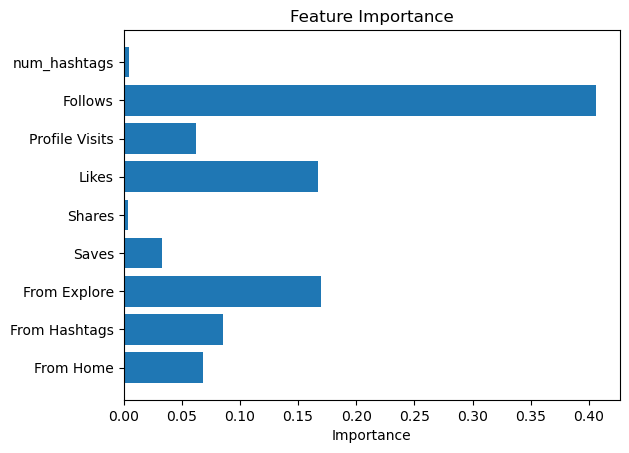

In [30]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = x.columns
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
